# Predicting Property Damage Costs

## Data Validation
This data set has 9350 rows, and 13 columns.  I have validated all the columns against the criteria in the dataset table:

- property_id: A unique identifier with no duplicate entries. No data cleaning required.
- property_type: There are 448 missing values represented as '-' which I determined to be randomly distributed. To address this, I replaced these missing values with 'Unknown'.
- property_age: I found 97 negative values, but they fall within a reasonable range. To ensure consistency, I converted them to absolute values.
- crime_rate: The values range from 9 to 1853.75, and no cleaning is needed in this column.
- construction_materials: This column has 3 distinct categories, and no cleaning is needed.
- weather_precipitation: The values range from 10 to 119.99 inches, and no cleaning is required.
- weather_temperature: The values range from 0 to 94.99 Fahrenheit, and no cleaning is needed here.
- claim_type: There are 448 missing values for this column, and my investigation indicates a completely random distribution. I've replaced these missing values with 'Unknown'.
- claim_amount: The values range from 968.61 to 24917.43, and no cleaning is necessary for this column.
- property_damage_cost: The values range from 687.72 to 78409.66, and no cleaning is required in this column.
- insured_value: The values range from 3744 to 424779.35, with a possibility of outliers due to the wide range. I'll conduct further exploratory analysis to identify and address these outliers.
- policyholder_age: The values range from 18 to 80, and no cleaning is needed in this column.
- property_size: The values range from 447 to 110147 square feet, and no cleaning is necessary for this column.

After data validation, the dataset still has 9350 rows, and 13 columns.

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Set the plot style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

# Set the figure size for all the figures
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
df = pd.read_csv('data/property.csv')

In [3]:
#replace missing values with Unknown
df['property_type'] = df['property_type'].replace('-',None)
df = df.fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             9350 non-null   int64  
 1   property_type           9350 non-null   object 
 2   property_age            9350 non-null   int64  
 3   crime_rate              9350 non-null   float64
 4   construction_materials  9350 non-null   object 
 5   weather_precipitation   9350 non-null   float64
 6   weather_temperature     9350 non-null   float64
 7   claim_type              9350 non-null   object 
 8   claim_amount            9350 non-null   float64
 9   property_damage_cost    9350 non-null   float64
 10  insured_value           9350 non-null   float64
 11  policyholder_age        9350 non-null   int64  
 12  property_size           9350 non-null   int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 949.7+ KB


In [4]:
#validate the negative values in property_age and take absolute values
df[df['property_age'] < 0].shape
df['property_age'] = abs(df['property_age'])

In [5]:
#covert the data type of property_id to nominal
df['property_id'] = df['property_id'].astype('str')
df.describe()

,property_age,crime_rate,weather_precipitation,weather_temperature,claim_amount,property_damage_cost,insured_value,policyholder_age,property_size
count,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000
mean,25.439037,1435.246824,29.791820,56.636422,10606.159822,14311.498616,58725.536001,48.745348,13748.554011
std,14.543052,1589.235858,18.961991,23.755973,4708.182128,8964.483352,37086.317846,18.120816,12045.376182
min,1.000000,9.900000,10.000000,0.010000,1209.230000,781.920000,4219.390000,18.000000,422.000000
25%,13.000000,416.200000,18.282500,42.862500,7322.122500,7746.242500,34306.317500,33.000000,5393.000000
50%,25.000000,906.150000,26.250000,57.420000,9593.460000,12459.260000,51089.375000,49.000000,10399.000000
75%,38.000000,1888.750000,34.677500,75.825000,14446.392500,18823.850000,75112.400000,64.000000,17964.000000
max,50.000000,16971.100000,119.800000,95.000000,25041.620000,63648.010000,542911.600000,80.000000,108582.000000


## Exploratory Analysis

### Target Variable - Property Damage Cost

Since we need to predict the property damage cost, the property damage cost variable would be our target variable. From the histogram on the left below, we can see a right-skewed distribution. However, the intensity of skew is moderate, so we decided to perform a log transformation in the prediction. 

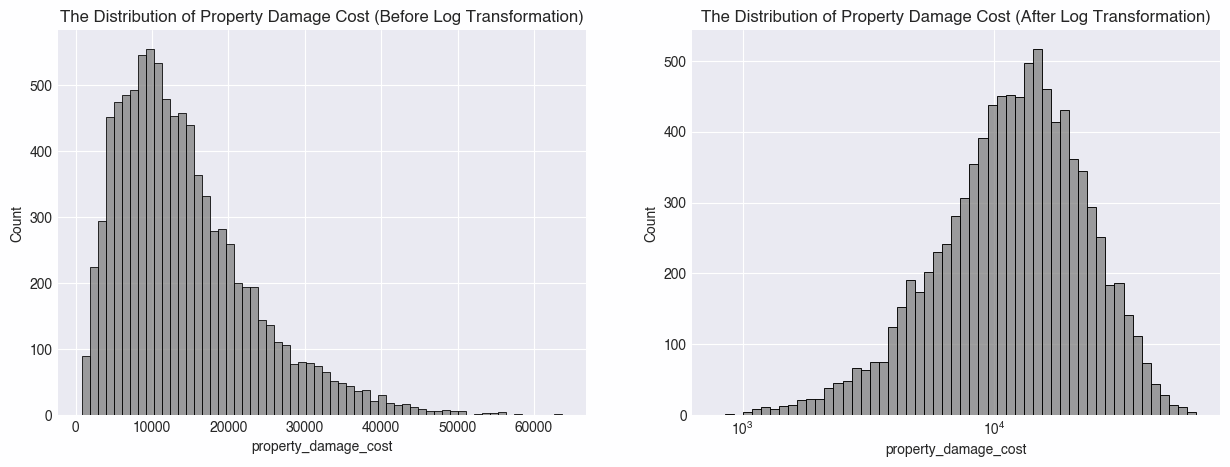

In [6]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['property_damage_cost'],color='gray',ax=axes[0]).set(title='The Distribution of Property Damage Cost (Before Log Transformation)')
sns.histplot(df['property_damage_cost'],log_scale=True,color='gray',ax=axes[1]).set(title='The Distribution of Property Damage Cost (After Log Transformation)');

### Numeric Variables - 8 Variables vs. Property Damage Cost

The heatmap analysis reveals distinct relationships that can be grouped into four categories based on their linear correlation with property damage cost:

1. **Moderate Linear Relationship (0.5-0.7)** with Property Damage Cost (These variables also exhibit a moderate linear relationship with each other):

   - claim_amount
   - insured_value
2. **Moderate to Weak Linear Relationship (0.3-0.5)** with Property Damage Cost (These variables show a stronger linear relationship with each other):

   - crime_rate
   - property_size
3. **Weak Linear Relationship (0.1-0.3)** with Property Damage Cost:

   - property_age
4. **No Linear Relationship (<0.1)** with Property Damage Cost:

   - weather_precipitation
   - weather_temperature
   - policyholder_age

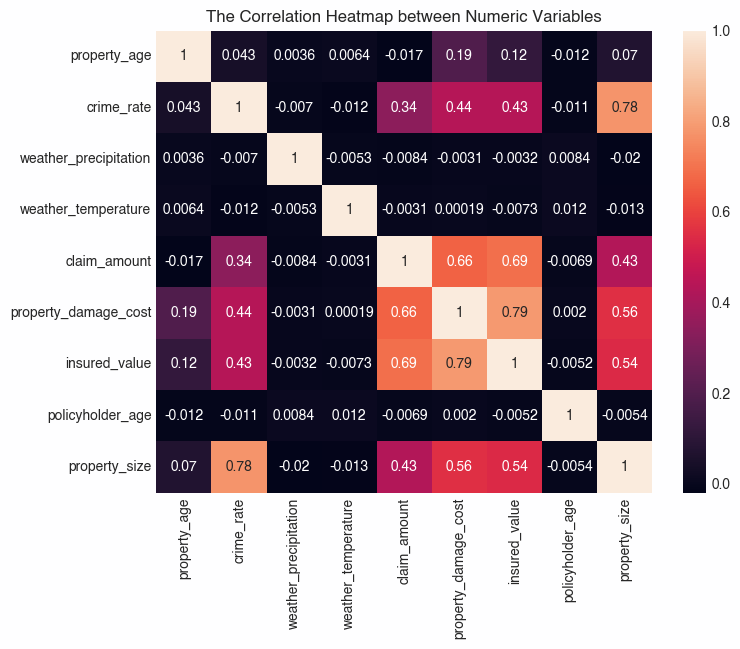

In [7]:
numeric_columns = df.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');

#### Characteristics of Claim Amount and Insured Value

The graphical representations clearly illustrate the characteristics of the two key variables:

- Insured Value: The distribution of insured value appears right-skewed, indicating the presence of higher values that deviate from the majority. Moreover, some data points are observed as outliers, which need to be removed.

- Claim Amount: The distribution of claim amount exhibits a distinctive pattern with three distinct peaks. This suggests the likelihood of multiple subgroups within the data, each with its unique claims behavior and underlying characteristics.

Importantly, a moderate linear relationship between insured value and claim amount is evident from the analysis. Given this observed correlation, it would be beneficial to incorporate both insured value and claim amount as features in our analysis. This decision capitalizes on the potential predictive power of these two variables, offering a more comprehensive representation of the underlying patterns within the data.







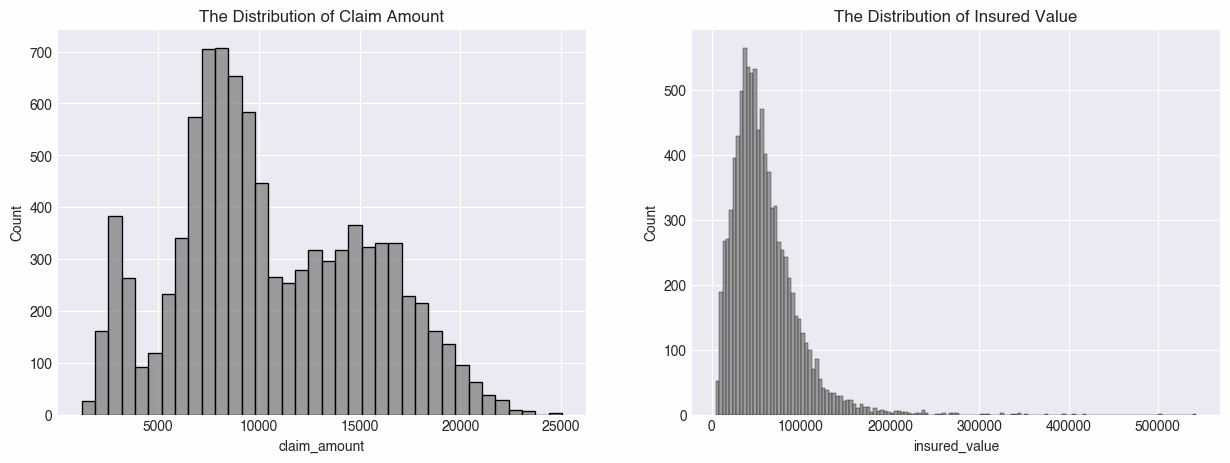

In [8]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['claim_amount'],color='gray',ax=axes[0]).set(title='The Distribution of Claim Amount')
sns.histplot(df['insured_value'], color='gray',ax=axes[1]).set(title='The Distribution of Insured Value');

In [9]:
# Calculate the IQR (Interquartile Range) for the 'insured_value' column
Q1 = df['insured_value'].quantile(0.25)
Q3 = df['insured_value'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'insured_value' outliers
df = df[(df['insured_value'] >= lower_bound) & (df['insured_value'] <= upper_bound)]

#### Characteristics of Crime Rate and Property Size

The graphs below reveal a noticeable right-skew in both the crime rate and property size distributions. Furthermore, these distributions exhibit striking similarities. Considering the collinearity between these two variables, I have made the decision to incorporate only the "property_size" as a feature, simplifying the model while retaining crucial information.

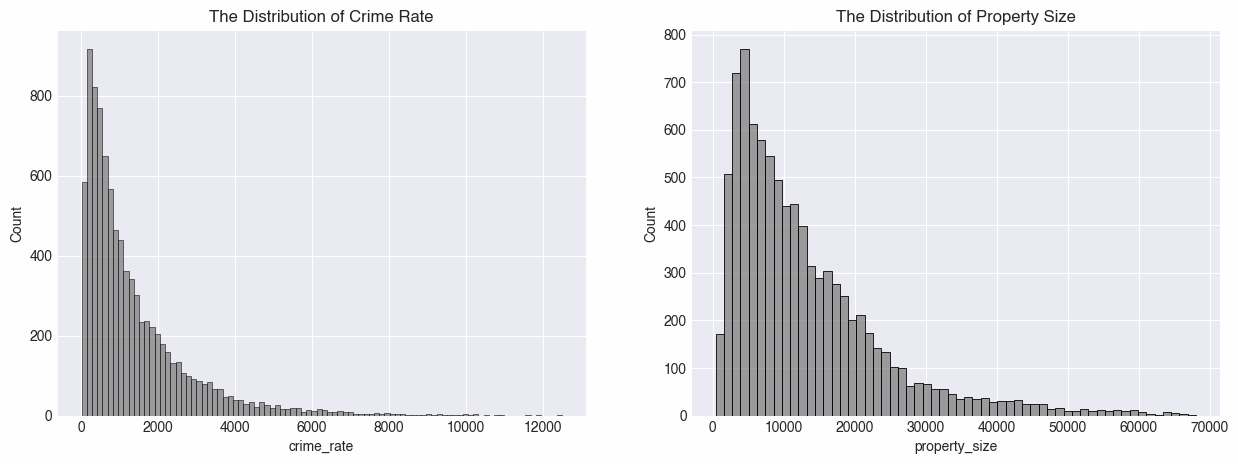

In [10]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['crime_rate'],color='gray',ax=axes[0]).set(title='The Distribution of Crime Rate')
sns.histplot(df['property_size'],color='gray',ax=axes[1]).set(title='The Distribution of Property Size');

#### Relationship with Property Age, Weather Precipitation, Weather Temperature, Policyholder Age
The direct linear connection between these variables and the target isn't strong, so I explored for non-linear links. I noticed an interesting trend in the scatterplots between weather precipitation and property damage cost—when the average precipitation exceeds 40 inches, there's a notable increase in claims tied to the property. This behavior isn't evident in other scatterplots where no consistent relationship is visible. Based on these findings, I'll create a new feature called `precipitation_group`. However, I've decided to exclude the other features from the model due to the absence of clear patterns or connections in the scatterplots. This streamlined approach leverages the distinct precipitation trend to enhance the model without overcomplicating it with less impactful features.

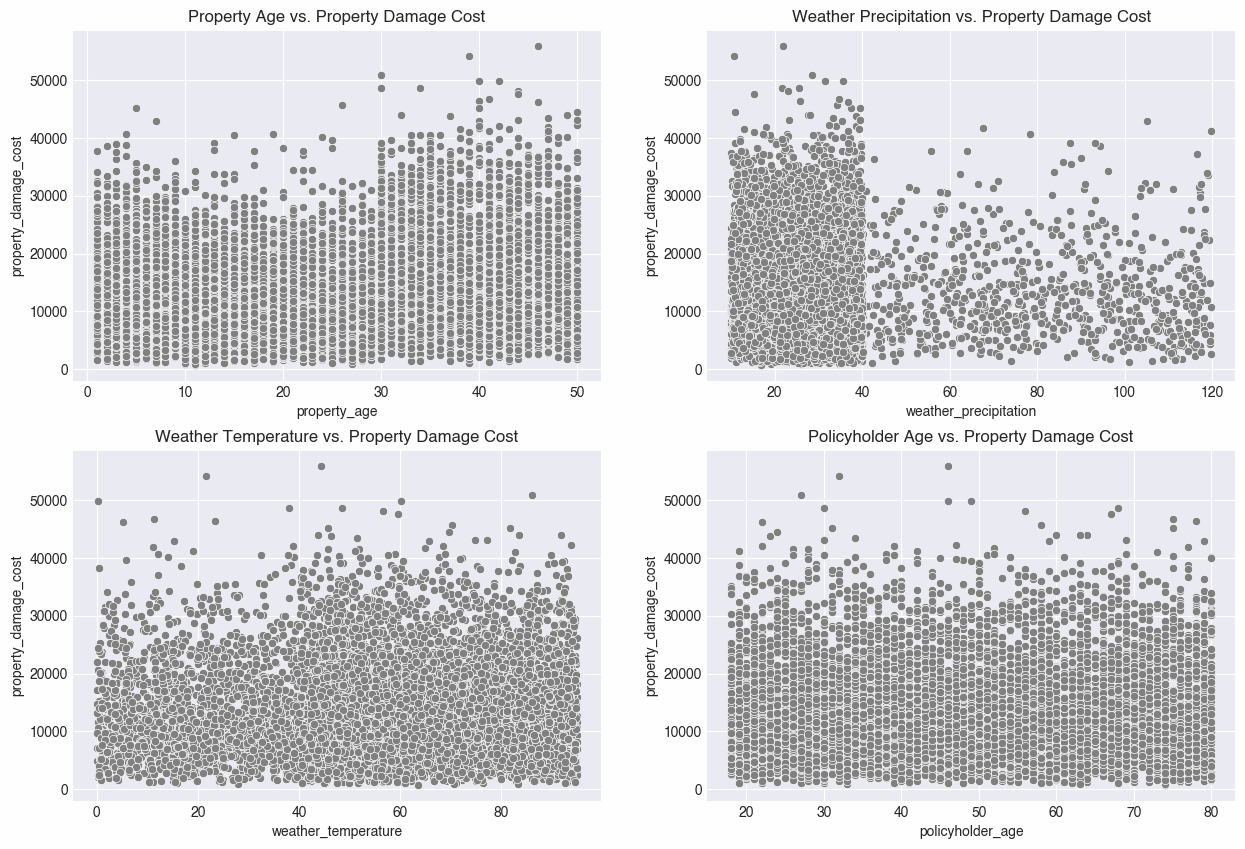

In [11]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(y=df['property_damage_cost'],x=df['property_age'],color='gray',ax=axes[0,0]).set(title='Property Age vs. Property Damage Cost')
sns.scatterplot(y=df['property_damage_cost'],x=df['weather_precipitation'],color='gray',ax=axes[0,1]).set(title='Weather Precipitation vs. Property Damage Cost')
sns.scatterplot(y=df['property_damage_cost'],x=df['weather_temperature'],color='gray',ax=axes[1,0]).set(title='Weather Temperature vs. Property Damage Cost')
sns.scatterplot(y=df['property_damage_cost'],x=df['policyholder_age'],color='gray',ax=axes[1,1]).set(title='Policyholder Age vs. Property Damage Cost');

In [12]:
bins = [0,40,150]  # Precipitation values below or equal to 1 and above 1

# Define labels for the groups
labels = ['Low Precipitation', 'High Precipitation']

# Use pd.cut to create a new column indicating the group
df['precipitation_group'] = pd.cut(df['weather_precipitation'], bins=bins, labels=labels)

### Categorical Variables - Property Type, Claim Type, Construction Materials vs. Property Damage Cost
#### Characteristics of Property Type, Claim Type, and Construction Materials
The bar charts reveal valuable insights about the dataset:

- Property Type Distribution: The predominant property type among the claims is the "single-family house." It stands out as the most frequent property type in the dataset.

- Common Claim Type: Among the claims, the "water damage" claim type is the most prevalent. This claim type represents a significant portion of the reported incidents.

- Construction Material: Wood is the primary construction material associated with the properties in the claims. This suggests that a substantial number of the properties affected by claims have wood as their construction material.

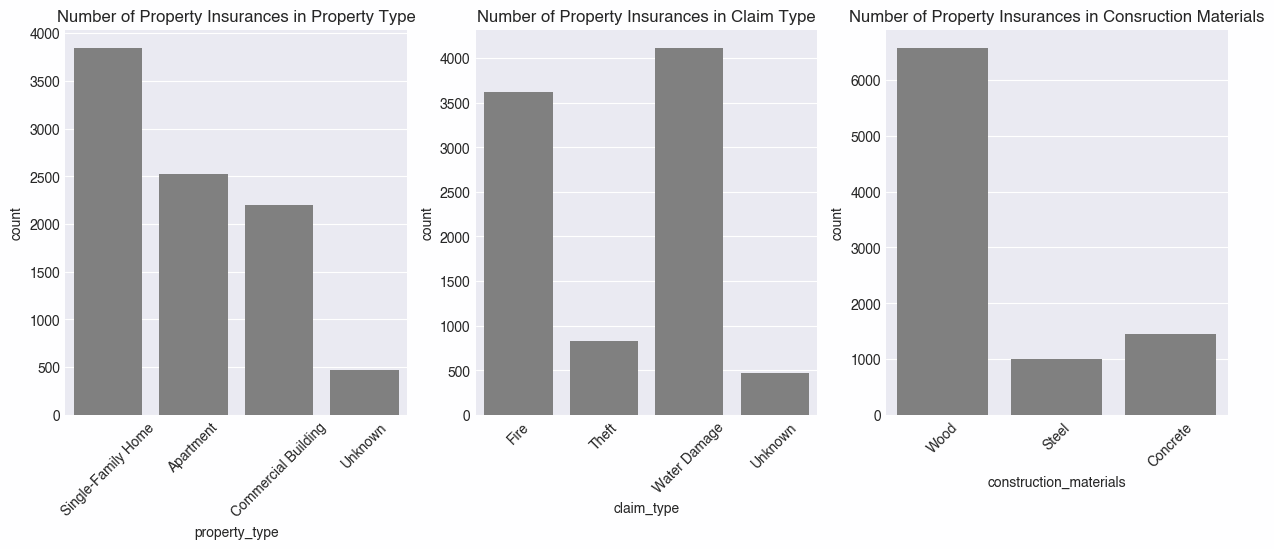

In [13]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=df['property_type'], color='gray',ax=axes[0]).set(title='Number of Property Insurances in Property Type')
sns.countplot(x=df['claim_type'],color='gray',ax=axes[1]).set(title='Number of Property Insurances in Claim Type')
sns.countplot(x=df['construction_materials'],color='gray',ax=axes[2]).set(title='Number of Property Insurances in Consruction Materials')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45);

#### Relationship with Property Damage Cost 

The boxplots provide valuable insights into the relationship between the variables and property damage costs:

- Claim Type: The boxplots reveal noticeable differences in the distribution of property damage costs among different claim types. This suggests that the nature of the claim type significantly impacts the resulting property damage costs.

- Construction Material: Similarly, the boxplots show distinct variations in property damage costs based on the construction material. This indicates that the choice of construction material has a meaningful influence on the extent of property damage costs.

- Property Type: On the other hand, the boxplots for property types indicate that there is less variation in property damage costs among different property types. This suggests that property type might not be a dominant factor in influencing property damage costs, at least based on the current dataset.

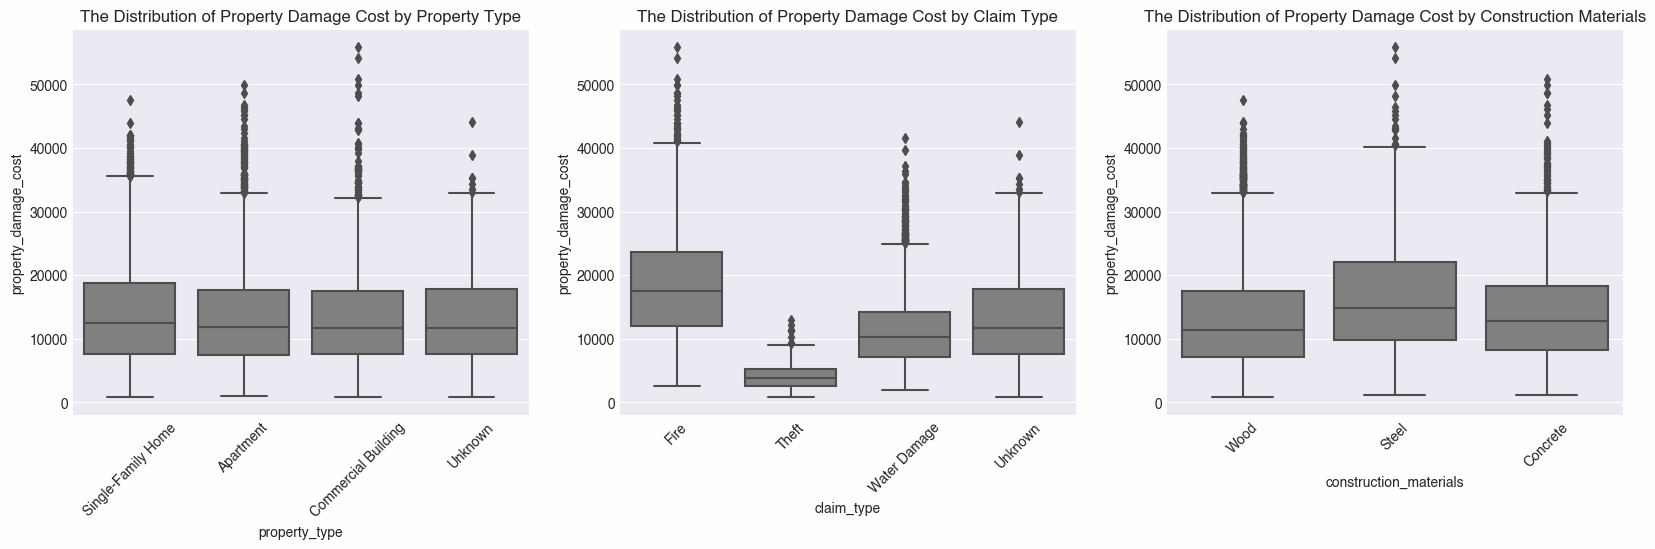

In [14]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=df, x='property_type',y='property_damage_cost',color='gray',ax=axes[0]).set(title='The Distribution of Property Damage Cost by Property Type')
sns.boxplot(data=df, x='claim_type',y='property_damage_cost',color='gray',ax=axes[1]).set(title='The Distribution of Property Damage Cost by Claim Type')
sns.boxplot(data=df, x='construction_materials',y='property_damage_cost',color='gray',ax=axes[2]).set(title='The Distribution of Property Damage Cost by Construction Materials')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45);

## Model Fitting & Evaluation
Predicting the property damage cost is a regression problem in machine learning.

**Baseline Model: Ridge Regression**

Ridge Regression is a good choice due to the observed strong to moderate relationships between some features and the target variable (property damage cost) in your dataset. Additionally, Ridge Regression handles multicollinearity by adding a penalty term.

**Comparison Model: XGBoost Regression**

XGBoost Regression is an excellent choice because it can capture complex relationships between features and the target variable. Additionally, it includes built-in regularization techniques, such as L1 and L2 regularization, which can help prevent overfitting.

### Prepare Data for Modelling
To enable modeling, we chose `insured_value`, `property_size`, `claim_amount`, `construction_materials`, `claim_type`, `precipitation_group` as target variables. I also have made the following changes:
- Apply log transformation to the target variable
- Normalize the numeric features
- Convert the categorical variables into numeric features
- Split the data into a training set and a test set

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_squared_error

In [16]:
feature_cols = ['insured_value','property_size','claim_amount','construction_materials','claim_type','precipitation_group']
X = df[feature_cols] # Features
y = np.log(df['property_damage_cost'])# Target variable with log transformation
X = pd.get_dummies(X)

# Initialize the RobustScaler
power_transformer= PowerTransformer()

# Fit and transform the scaler on the feature data
X_scaled = power_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Ridge Regression Model

In [17]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid for grid search
param_grid = {
    'alpha': [5,6,7]  # Experiment with different values
}
# Initialize the Ridge Regression model
ridge_model = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Best Alpha:", best_params['alpha'])
print("Best Ridge Regression R2 Score:", r2)
print("Best Ridge Regression Root Mean Squared Error:", rmse)

Best Alpha: 5
Best Ridge Regression R2 Score: 0.7652720899403562
Best Ridge Regression Root Mean Squared Error: 0.31993412139056293


#### Finding the feature importance

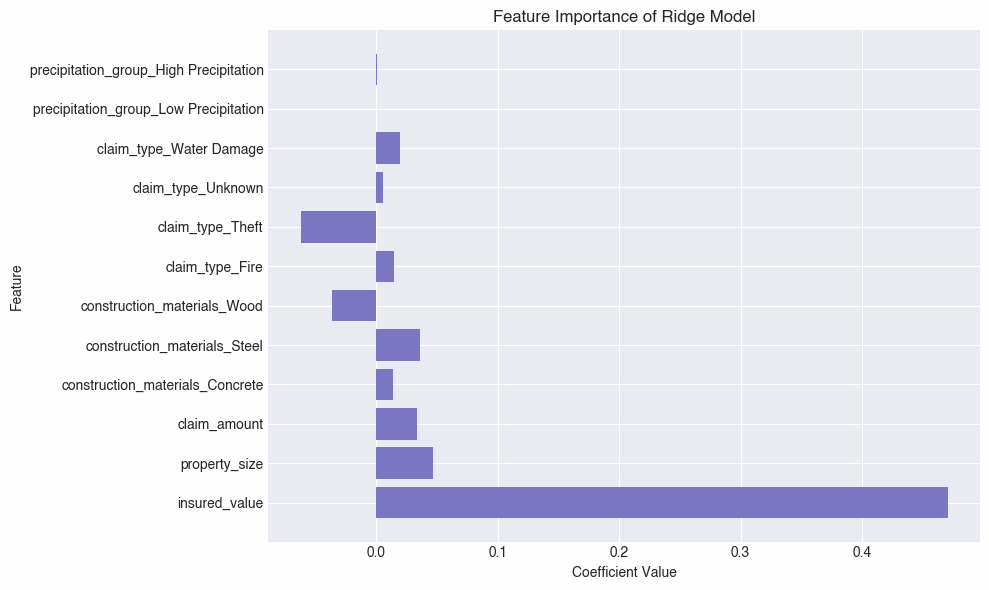

In [18]:
# Get the coefficients (feature importance) from the Ridge model
coefficients = best_ridge_model.coef_

# Get the names of the features
feature_names = X.columns  # Replace with your actual feature names

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), coefficients, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance of Ridge Model')
plt.tight_layout()

plt.show()

### XGBoosting Regression Model

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50,60,70],
    'learning_rate': [0.05,0.1],
    'max_depth': [5,6,7],
    'subsample': [0.8,1.0],
    'colsample_bytree': [0.9,1.0]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred2 = best_xgb_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)

print("Best Hyperparameters:", best_params)
print("Best XGBoost R2 Score:", r2)
print("Best XGBoost Root Mean Squared Error:", rmse)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 70, 'subsample': 0.8}
Best XGBoost R2 Score: 0.7892480249340613
Best XGBoost Root Mean Squared Error: 0.3031545014304954


#### Finding the feature importance

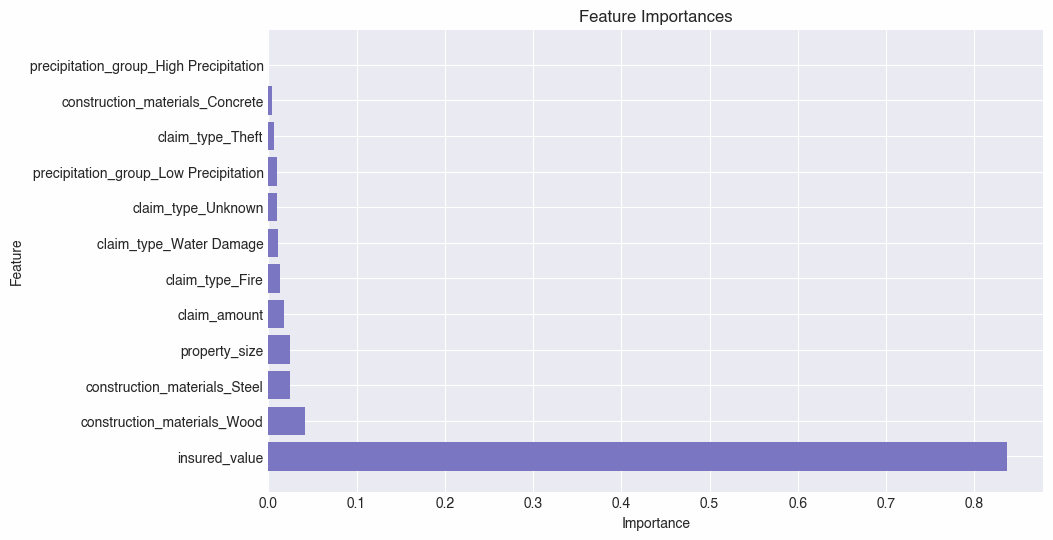

In [20]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Results

### Evaluation Metrics: R squared and RMSE

- R squared (Coefficient of Determination): This metric measures the proportion of the variance in the dependent variable (property damage cost) that is predictable from the independent variables (features). A higher R squared indicates a better fit of the model to the data.
- RMSE (Root Mean Squared Error): This metric provides a measure of how well the model's predictions match the actual observed values. It quantifies the average magnitude of the differences between predicted and actual values.

**XGBoost Regression** performs better because it has a higher R-squared and lower RMSE. This highlights the strengths of XGBoost Regression in terms of both explaining the variance in the target variable and providing more accurate predictions compared to other models. 

In this model, the insured value is the most important factor in predicting the property damage cost. This variable represents the value of the property insured by the policyholder. Higher insured values generally indicate more valuable properties, which often correlate with higher potential costs in the event of property damage.

### Evaluation by Business Criteria
The company will consider using the model if the mean absolute percentage error is less than 20%. So we will use Mean Absolute Percentage Error (MAPE) AS our KPI. Unfortunately, both of the models have not met that criteria yet. But the XGBoost Regression model will be the closer one.

In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.exp(y_true), np.exp(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) in Ridge Regression:", round(mape,2))

Mean Absolute Percentage Error (MAPE) in Ridge Regression: 27.17


In [23]:
mape = mean_absolute_percentage_error(y_test, y_pred2)
print("Mean Absolute Percentage Error (MAPE) in XGBoost Regression:", round(mape,2))

Mean Absolute Percentage Error (MAPE) in XGBoost Regression: 25.51


## Recommendation 

Since we can't meet the business criteria, which means that model did not generalize well. We need to focus on improving the following aspects and reevaluate the approach again.

1. **Feature Evaluation and Engineering**: Reassess the features used in the model. Investigate if there are features that can be improved, removed, or added to better capture the relationships in the data. Consider domain knowledge and gather input from subject matter experts to identify potential features that might enhance the model.
    - Property Characteristics: Reassess and include detailed property characteristics that might influence damage costs, such as age of property, location (urban/rural), construction type, and size.
    - Weather Data: Explore adding weather-related features like historical precipitation, temperature extremes, or storm data, as these factors can significantly impact property damage.
    - Claim History: Consider features related to previous claims on the property, which could indicate its susceptibility to damage and help in understanding potential patterns.
</br><br>
2. **Additional Data**: Explore the possibility of gathering more data and other possible features. The damage cost prediction is a very complex question because it have a lot of factors that will have an influence. A larger and more diverse dataset can improve the model's generalization.
   - Historical Damage Data: Explore obtaining historical property damage data (if available) to enrich the dataset and provide insights into past damage patterns.
   - External Data Sources: Look for external datasets that provide relevant information, such as natural disaster records, crime rates in the area, or property value trends.
</br><br>
3. **Revisit Business Objectives**: Reassess the business objectives and the desired outcome of the model. Ensure that the current objectives align with the practical needs of the company and adjust the success criteria if necessary.

    - Damage Cost Precision: Ensure that the business objectives focus on the precision of property damage cost predictions, as this is crucial for accurate risk assessment and resource allocation.
    - Stakeholder Alignment: Collaborate closely with stakeholders, such as underwriters or risk assessors, to align the model's objectives with their practical decision-making needs.
    - Thresholds for Risk Assessment: Reevaluate and possibly adjust the success criteria, such as setting specific thresholds for different levels of risk assessment (e.g., low, moderate, high damage).
